In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import shutil

In [2]:
base_dir="C:/Users/Administrator/Downloads/dogs-vs-cats"
img_dir="C:/Users/Administrator/Downloads/dogs-vs-cats/train/train"
mk_dir="C:/Users/Administrator/Downloads/dogs-vs-cats/train"

In [3]:
len(os.listdir(img_dir))

FileNotFoundError: [WinError 3] 지정된 경로를 찾을 수 없습니다: 'C:/Users/Administrator/Downloads/dogs-vs-cats/train/train'

In [4]:
dogs_and_cats=os.listdir(img_dir)

FileNotFoundError: [WinError 3] 지정된 경로를 찾을 수 없습니다: 'C:/Users/Administrator/Downloads/dogs-vs-cats/train/train'

In [5]:
len(dogs_and_cats)

NameError: name 'dogs_and_cats' is not defined

In [6]:
cats_dir=os.path.join(mk_dir,'cats')
os.mkdir(cats_dir)

FileExistsError: [WinError 183] 파일이 이미 있으므로 만들 수 없습니다: 'C:/Users/Administrator/Downloads/dogs-vs-cats/train\\cats'

In [7]:
dogs_dir=os.path.join(mk_dir,'dogs')
os.mkdir(dogs_dir)

FileExistsError: [WinError 183] 파일이 이미 있으므로 만들 수 없습니다: 'C:/Users/Administrator/Downloads/dogs-vs-cats/train\\dogs'

In [8]:
# Copy (cats)

fnames=['cat.{}.jpg'.format(i) for i in range(12500)]

for fname in fnames:
    scr=os.path.join(img_dir,fname)
    dst=os.path.join(cats_dir,fname)
    shutil.copyfile(scr,dst)

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/Administrator/Downloads/dogs-vs-cats/train/train\\cat.0.jpg'

In [9]:
# Copy (dogs)

fnames=['dog.{}.jpg'.format(i) for i in range(12500)]

for fname in fnames:
    scr=os.path.join(img_dir,fname)
    dst=os.path.join(dogs_dir,fname)
    shutil.copyfile(scr,dst)

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/Administrator/Downloads/dogs-vs-cats/train/train\\dog.0.jpg'

In [1]:
from PIL import Image
%matplotlib inline
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np
import torchvision
from torchvision import transforms
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import argparse
import numpy as np
import time
from copy import deepcopy # Add Deepcopy for args

In [2]:
transform = transforms.Compose([transforms.Resize((25,25)),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [16]:
trainset=torchvision.datasets.ImageFolder(root="C:/Users/Administrator/Downloads/dogs-vs-cats/train",
                                         transform=transform)
trainset, valset = torch.utils.data.random_split(trainset, [20000, 5000])
testset = torchvision.datasets.ImageFolder(root="C:/Users/Administrator/Downloads/dogs-vs-cats/test1",
                                         transform=transform)
partition={'train':trainset, 'val':valset, 'test':testset}

train_loader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True)
val_loader = torch.utils.data.DataLoader(valset, batch_size=128, shuffle=False)
test_loader = torch.utils.data.DataLoader(testset, batch_size=128, shuffle=False)

In [4]:
trainset.__getitem__(10)

(tensor([[[-0.8902, -0.8588, -0.7098,  ..., -0.4039, -0.5137, -0.6157],
          [-0.8431, -0.7490, -0.2941,  ..., -0.3647, -0.4039, -0.4745],
          [-0.8275, -0.8196, -0.3961,  ..., -0.3255, -0.3804, -0.4196],
          ...,
          [-0.1608, -0.1059, -0.1294,  ...,  0.2000, -0.4353, -0.5843],
          [-0.1922, -0.2471, -0.2314,  ..., -0.0039, -0.4196, -0.5529],
          [-0.2471, -0.2000, -0.3020,  ..., -0.1765, -0.5216, -0.6471]],
 
         [[-0.8588, -0.8196, -0.7333,  ..., -0.5294, -0.6863, -0.8431],
          [-0.8353, -0.7412, -0.5451,  ..., -0.4824, -0.5294, -0.6314],
          [-0.8353, -0.7333, -0.6078,  ..., -0.4431, -0.4902, -0.5373],
          ...,
          [-0.1843, -0.1294, -0.1843,  ..., -0.3569, -0.5529, -0.6392],
          [-0.2157, -0.2863, -0.3333,  ..., -0.2392, -0.5059, -0.6078],
          [-0.2706, -0.2157, -0.3804,  ..., -0.2941, -0.5765, -0.6941]],
 
         [[-0.7882, -0.7412, -0.7176,  ..., -0.6549, -0.7961, -0.9294],
          [-0.7725, -0.6863,

In [5]:
len(trainset)

20000

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 25, 25]) 0
torch.Size([25, 25, 3])


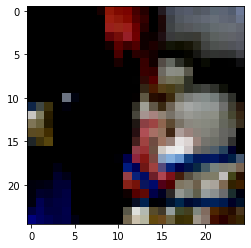

In [6]:
for i,j in testset:
    print(i.shape,j)
    i=i.transpose(0,2)
    print(i.shape)
    i=np.array(i)
    plt.imshow(i)
    break

In [7]:
class CNN(nn.Module):
    def __init__(self,):
        super(CNN, self).__init__()
        
        self.conv1=nn.Conv2d(1,32,5,1,2)
        self.conv2=nn.Conv2d(32,64,5,1,2)
        self.conv3=nn.Conv2d(64,128,5,1,2)
        self.fc1=nn.Linear(6272,1000)
        self.fc2=nn.Linear(1000,2)
        
        self.maxpool=nn.MaxPool2d(2,2)
        self.act=nn.ReLU()
        self.dropout=nn.Dropout(0.4)
        
        
    def forward(self,x):
        x=self.conv1(x)
        x=self.act(x)
        x=self.conv2(x)
        x=self.act(x)
        x=self.maxpool(x)
        x=self.conv3(x)
        x=self.act(x)
        x=self.maxpool(x)
        x=x.view(x.size(0),-1)
        x=self.dropout(x)
        x=self.fc1(x)
        x=self.fc2(x)
        
        return x

In [8]:
def dimension_check():
    net=CNN()
    x=torch.randn(1,1,28,28)
    y=net(x)
    print(y.shape)

In [9]:
dimension_check()

torch.Size([1, 2])


In [17]:
cls_loss = nn.CrossEntropyLoss()

In [18]:
import torch.optim as optim
from sklearn.metrics import accuracy_score

Number of 6532026 parameters


RuntimeError: Given groups=1, weight of size 32 1 5 5, expected input[128, 3, 25, 25] to have 1 channels, but got 3 channels instead